In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd

In [2]:
# Load the data for Counties adoption rate analysis
df = pd.read_csv(
    Path("../../../../../data/processed_data/ev_main_dataset.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.004006,3.101753
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.001336,9.105559
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.005219,5.688565
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.000723,0.671123


In [3]:
# Inspect the columns of the data
for index, value in enumerate(df.columns):
    print(index, value)

0 year
1 state
2 county
3 zip_codes
4 population
5 ev_registrations
6 cumulative_ev_stations
7 median_income
8 ev_adoption_rate
9 ev_growth_rate


In [4]:
# Convert `ev_adoption_rate` and `ev_growth_rate` to percentages
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000950,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000215,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.001481,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.400597,310.175344
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.133618,910.555852
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.521874,568.856477
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.072265,67.112299


In [5]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [6]:
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title, col=2):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', loc="best", ncol=col, **legend_style)

    return ax

In [7]:
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax


In [8]:
# Inspect for anomalies behavior in the data using interactive hvplot
# TEXAS: EV Adoption Rate Over Time by County

# Filter the data to select only counties in Texas
tx_df = df.loc[df["state"] == "TX"]

tx_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='Texas EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

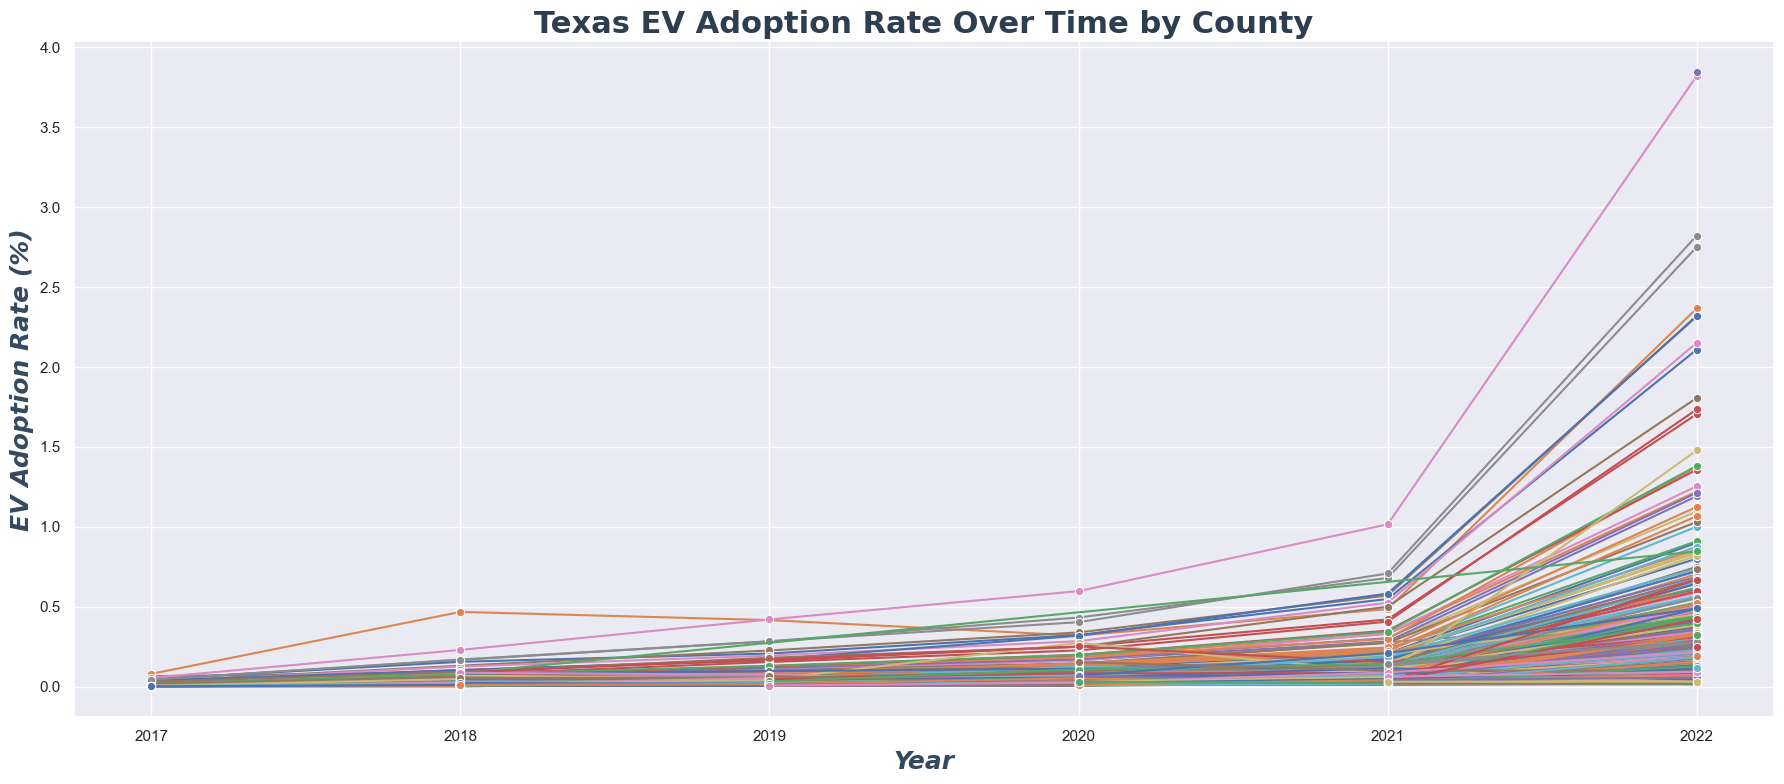

In [9]:
# Plot the EV vehicle adoption rate over time by county in Texas

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    tx_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Texas EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [10]:
# Filter the data for the year to plot for Texas
year_to_plot = 2022
year_df = tx_df[tx_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in Texas for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

In [11]:
# Filter the data to select only the counties in Florida
fl_df = df.loc[df["state"] == "FL"]

# Inspection for anomalies behavior in the data using interactive hvplot
fl_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='Florida EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)


:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

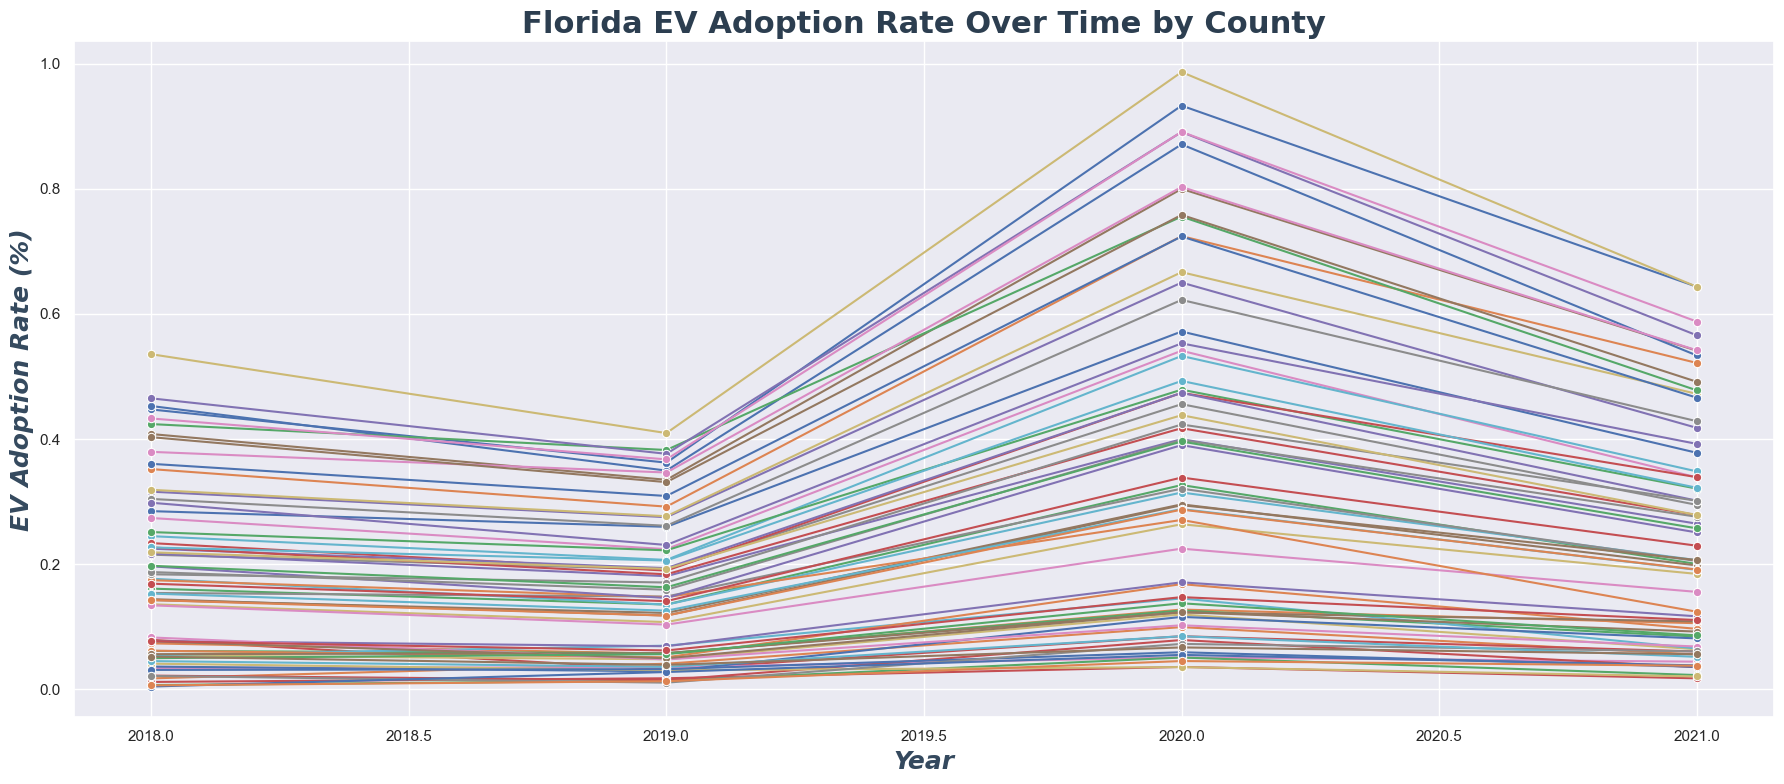

In [12]:
# Plot the EV vehicle adoption rate over time by county in Florida

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    fl_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Florida EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "fl_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [13]:
# Filter the data for the year to plot for Florida
year_to_plot = 2021
year_df = tx_df[tx_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in Florida for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

In [14]:
# Filter the data to select only the counties in California
ca_df = df.loc[df["state"] == "CA"]

# Inspection for anomalies behavior in the data using interactive hvplot
ca_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='California EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

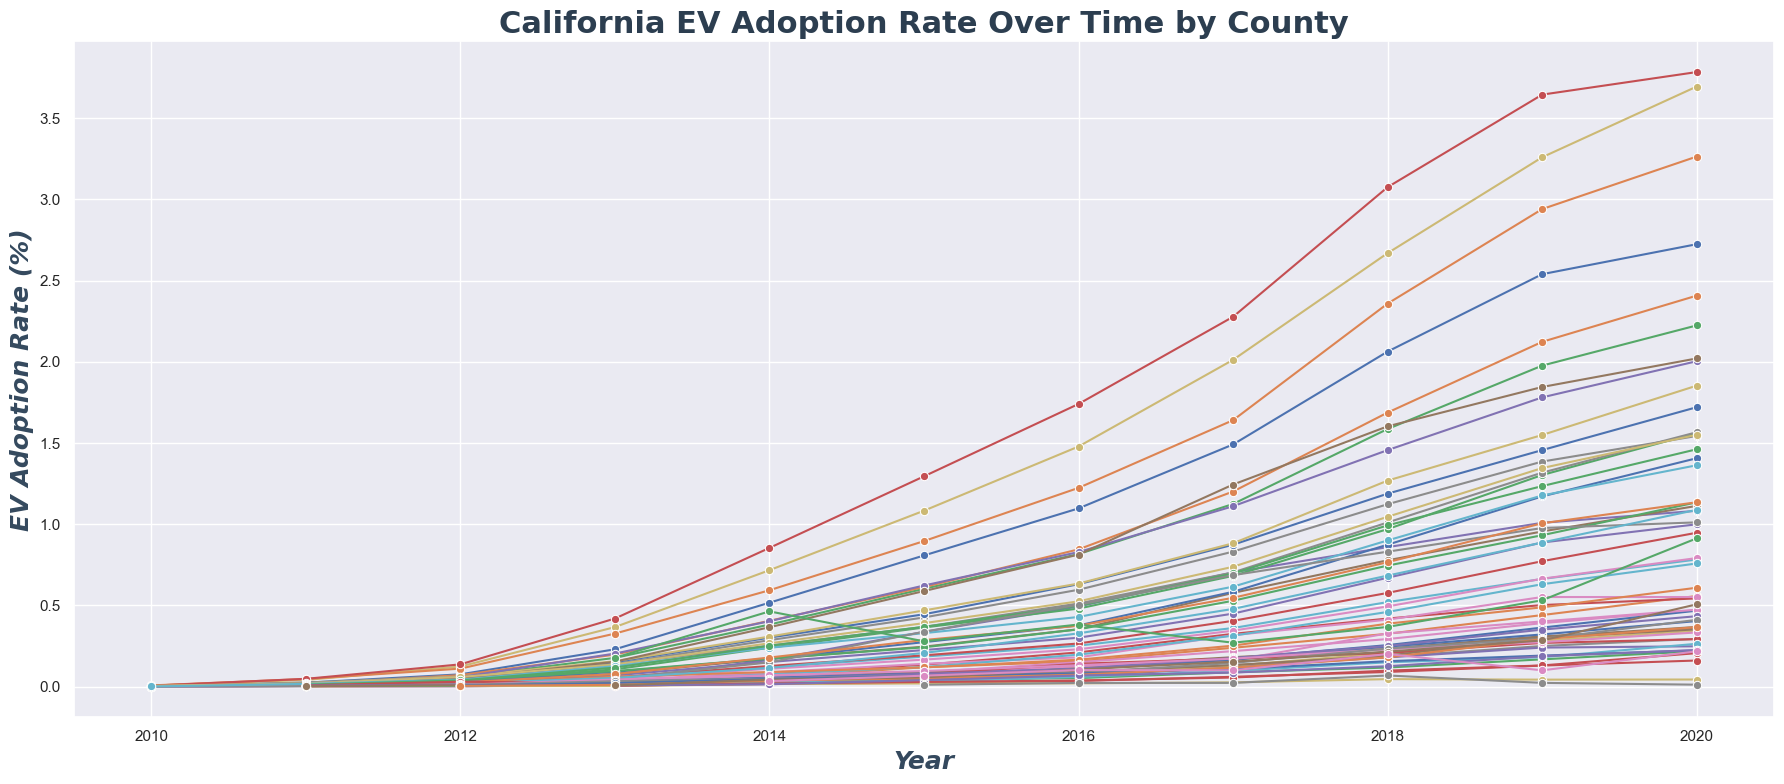

In [15]:
# Plot the EV vehicle adoption rate over time by county in California

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    ca_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="California EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ca_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [16]:
# Filter the data for the year to plot for California
year_to_plot = 2020
year_df = ca_df[ca_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in California for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

# Top 10 Counties

In [17]:
# Create a function to get the top 10 counties by EV adoption rate
def get_top_10_counties(df, year_column='year', rate_column='ev_adoption_rate', county_column='county'):
    # Determine the most recent year in the DataFrame
    most_recent_year = df[year_column].max()
    
    # Filter the DataFrame for the most recent year
    recent_year_df = df.loc[df[year_column] == most_recent_year]
    
    # Get the top 10 counties by EV adoption rate
    top_10_df = recent_year_df.nlargest(10, rate_column)
    
    # Return the list of top 10 counties
    return top_10_df[county_column].tolist()

In [18]:
# Get the top 10 counties by EV adoption rate for Texas, Florida, and California
tx_top_10_list = get_top_10_counties(tx_df)
fl_top_10_list = get_top_10_counties(fl_df)
ca_top_10_list = get_top_10_counties(ca_df)

# Confirm the top 10 counties for each state
print("Texas Top 10", tx_top_10_list)
print("Florida Top 10", fl_top_10_list)
print("California Top 10", ca_top_10_list)

Texas Top 10 ['King County', 'Travis County', 'Williamson County', 'Collin County', 'Caldwell County', 'Denton County', 'Kendall County', 'Hays County', 'Comal County', 'Rockwall County']
Florida Top 10 ['Collier County', 'Palm Beach County', 'St. Johns County', 'Sarasota County', 'Orange County', 'Broward County', 'Martin County', 'Miami-Dade County', 'Seminole County', 'Monroe County']
California Top 10 ['Santa Clara County', 'Marin County', 'San Mateo County', 'Alameda County', 'Orange County', 'Contra Costa County', 'Sonoma County', 'Santa Cruz County', 'San Francisco County', 'Napa County']


In [19]:
# Create a seperate DataFrame for the top 10 counties in Texas, Florida, and California
tx_top_10_df = tx_df.copy()
fl_top_10_df = fl_df.copy()
ca_top_10_df = ca_df.copy()

# Filter the DataFrames to include only the top 10 counties
tx_top_10_df = tx_top_10_df[tx_top_10_df['county'].isin(tx_top_10_list)]
fl_top_10_df = fl_top_10_df[fl_top_10_df['county'].isin(fl_top_10_list)]
ca_top_10_df = ca_top_10_df[ca_top_10_df['county'].isin(ca_top_10_list)]

# Preview the top 10 counties DataFrames
display(tx_top_10_df.head(2))
display(fl_top_10_df.head(2))
display(ca_top_10_df.head(2))

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
436,2017,TX,Caldwell County,"[78616, 78622, 78644, 78648, 78655, 78656, 78661]",42328,34,0,51346,0.080325,NaN
442,2017,TX,Collin County,"[75002, 75009, 75013, 75023, 75024, 75025, 750...",971864,424,25,90124,0.043628,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
609,2018,FL,Broward County,"[33004, 33008, 33009, 33019, 33020, 33021, 330...",1946107,7942,70,57333,0.408097,NaN
614,2018,FL,Collier County,"[34101, 34102, 34103, 34104, 34105, 34106, 341...",378201,1692,21,65675,0.447381,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000950,NaN


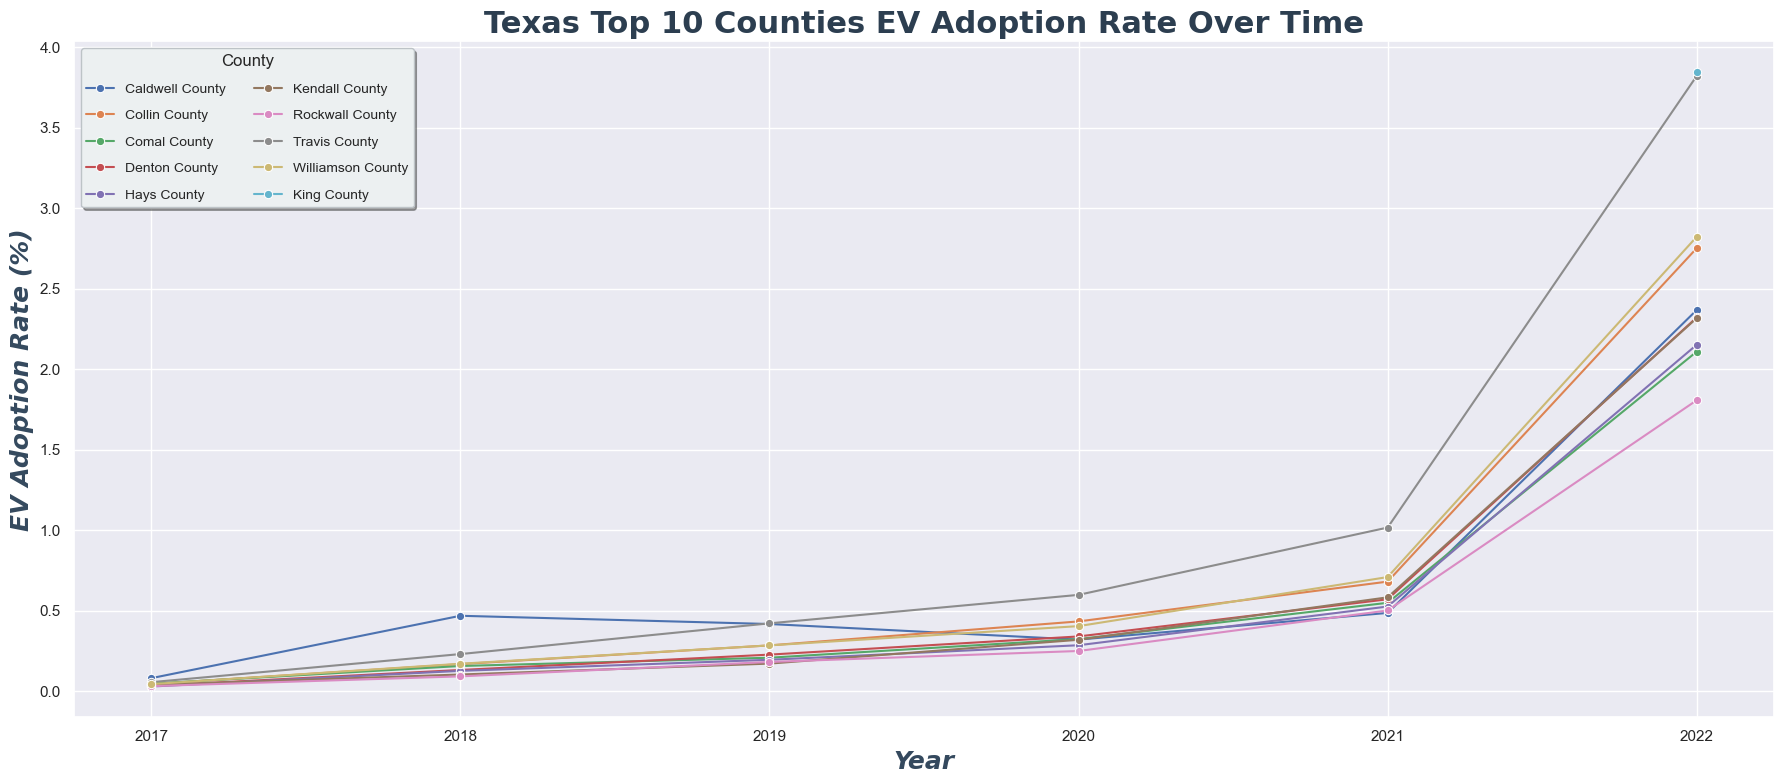

In [20]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in Texas

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=tx_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Texas Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

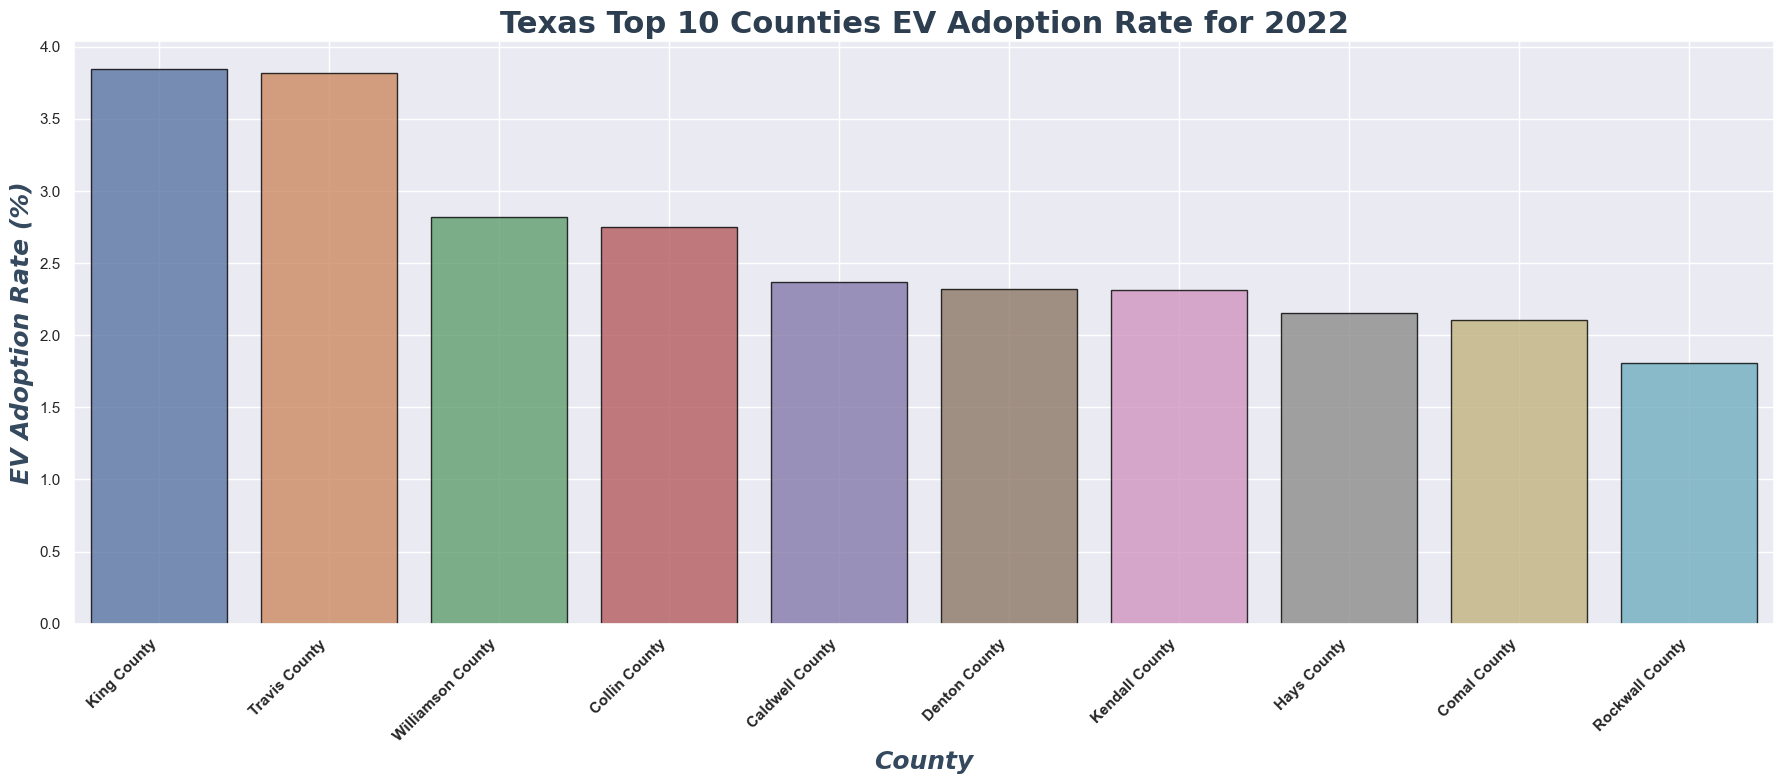

In [21]:
# Plot the EV vehicle adoption rate for a specific year for the top 10 counties in Texas

# Filter the data for the year to plot for Texas
year_to_plot = 2022
year_df = tx_top_10_df[tx_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'Texas Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "tx_top_10_counties_2022.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.show()

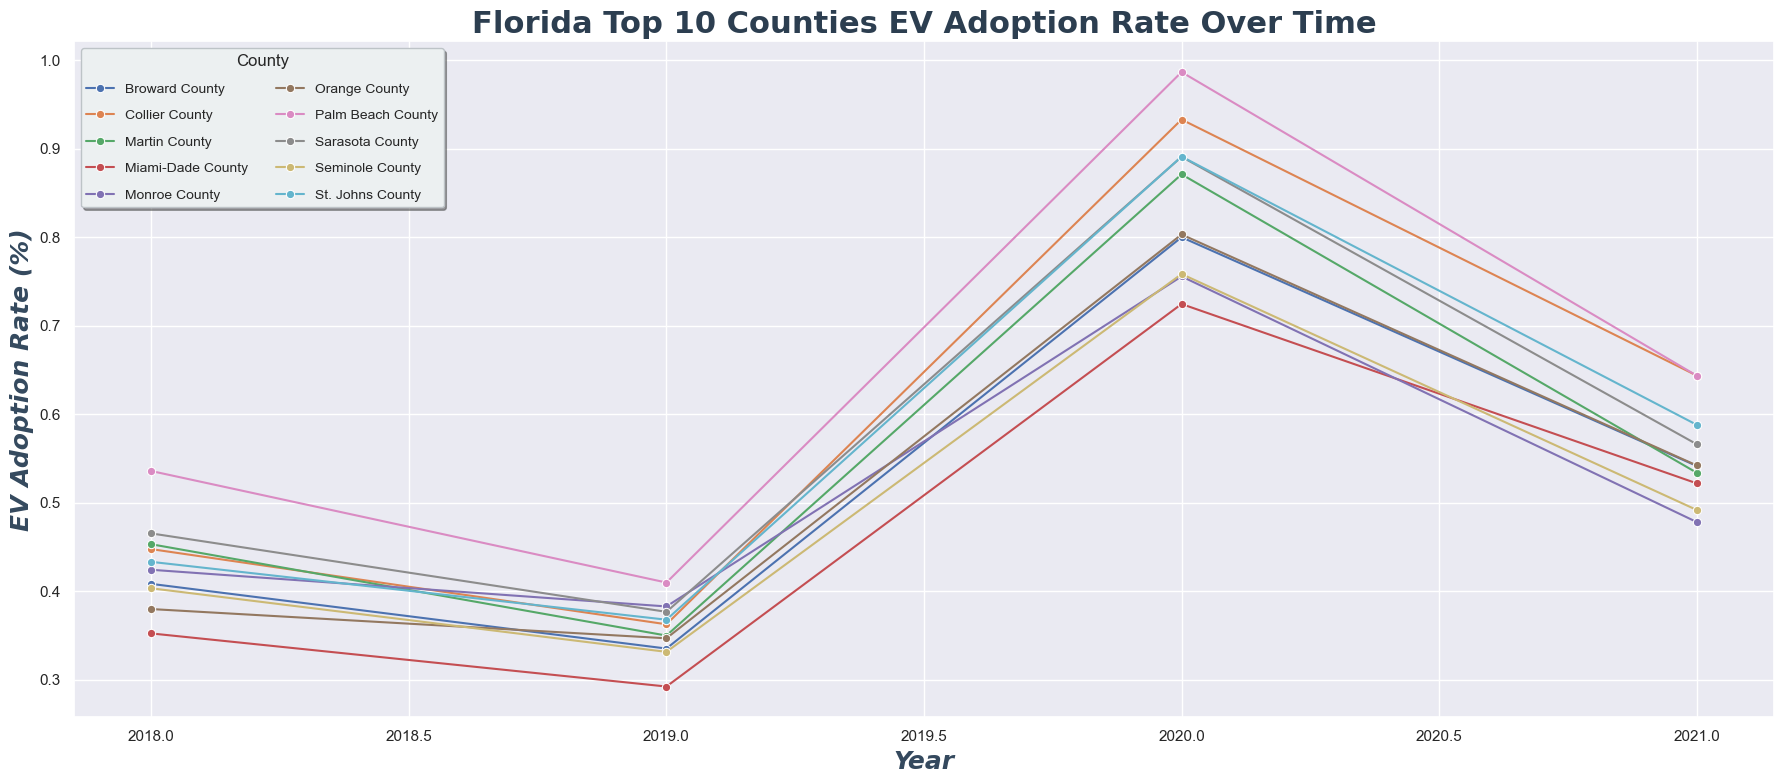

In [22]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in Florida

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=fl_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Florida Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

file_name = "fl_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

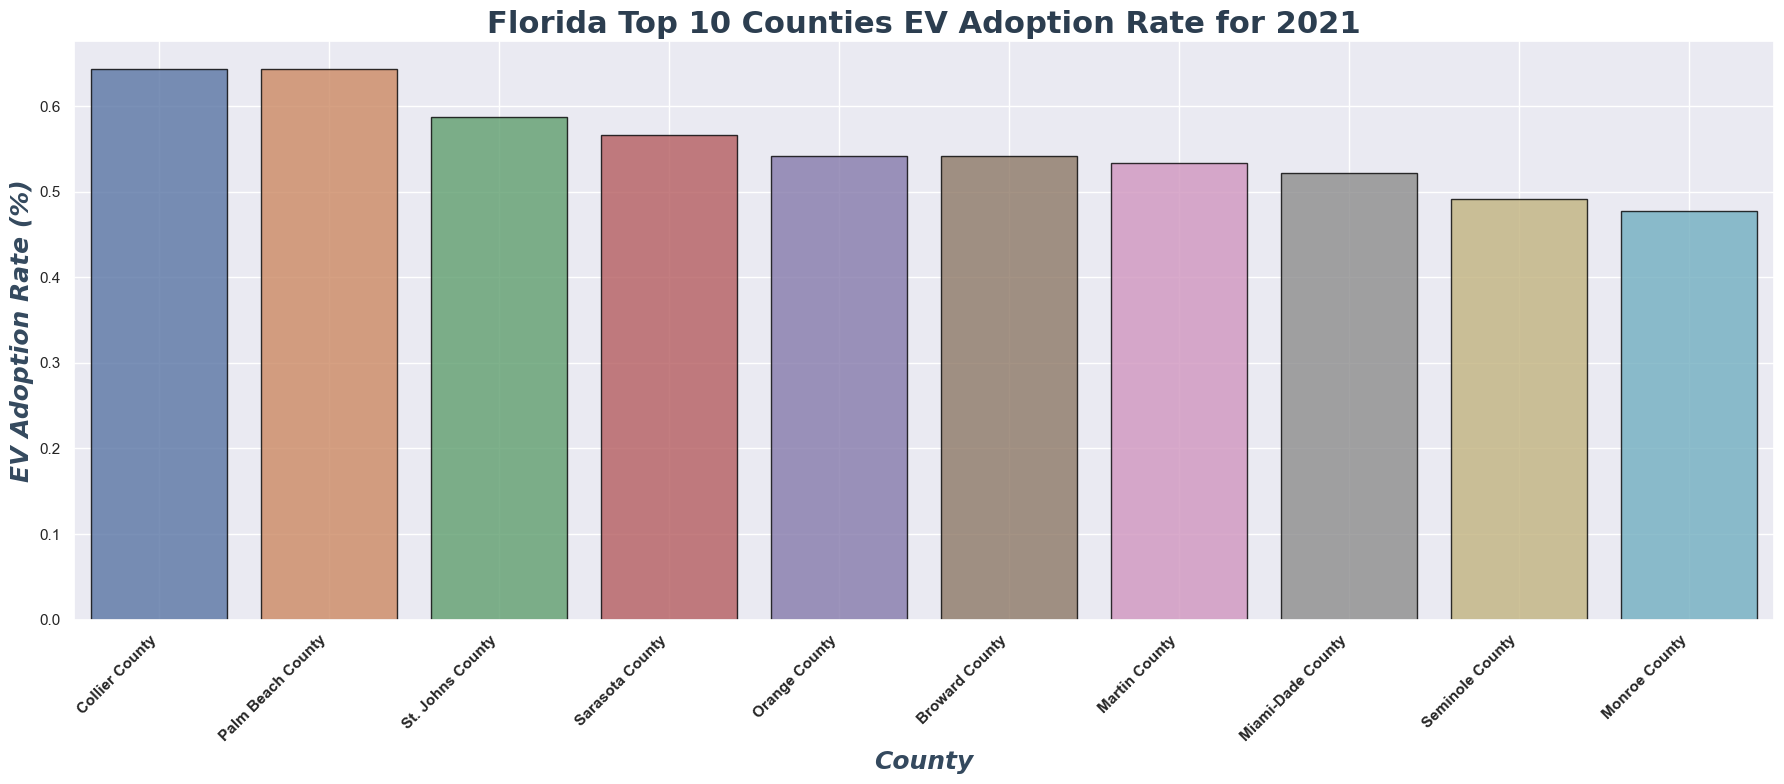

In [23]:
# Plot the EV vehicle adoption rate for a specific year for the top 10 counties in Florida
year_to_plot = 2021
year_df = fl_top_10_df[fl_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'Florida Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "fl_top_10_counties_2021.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.show()

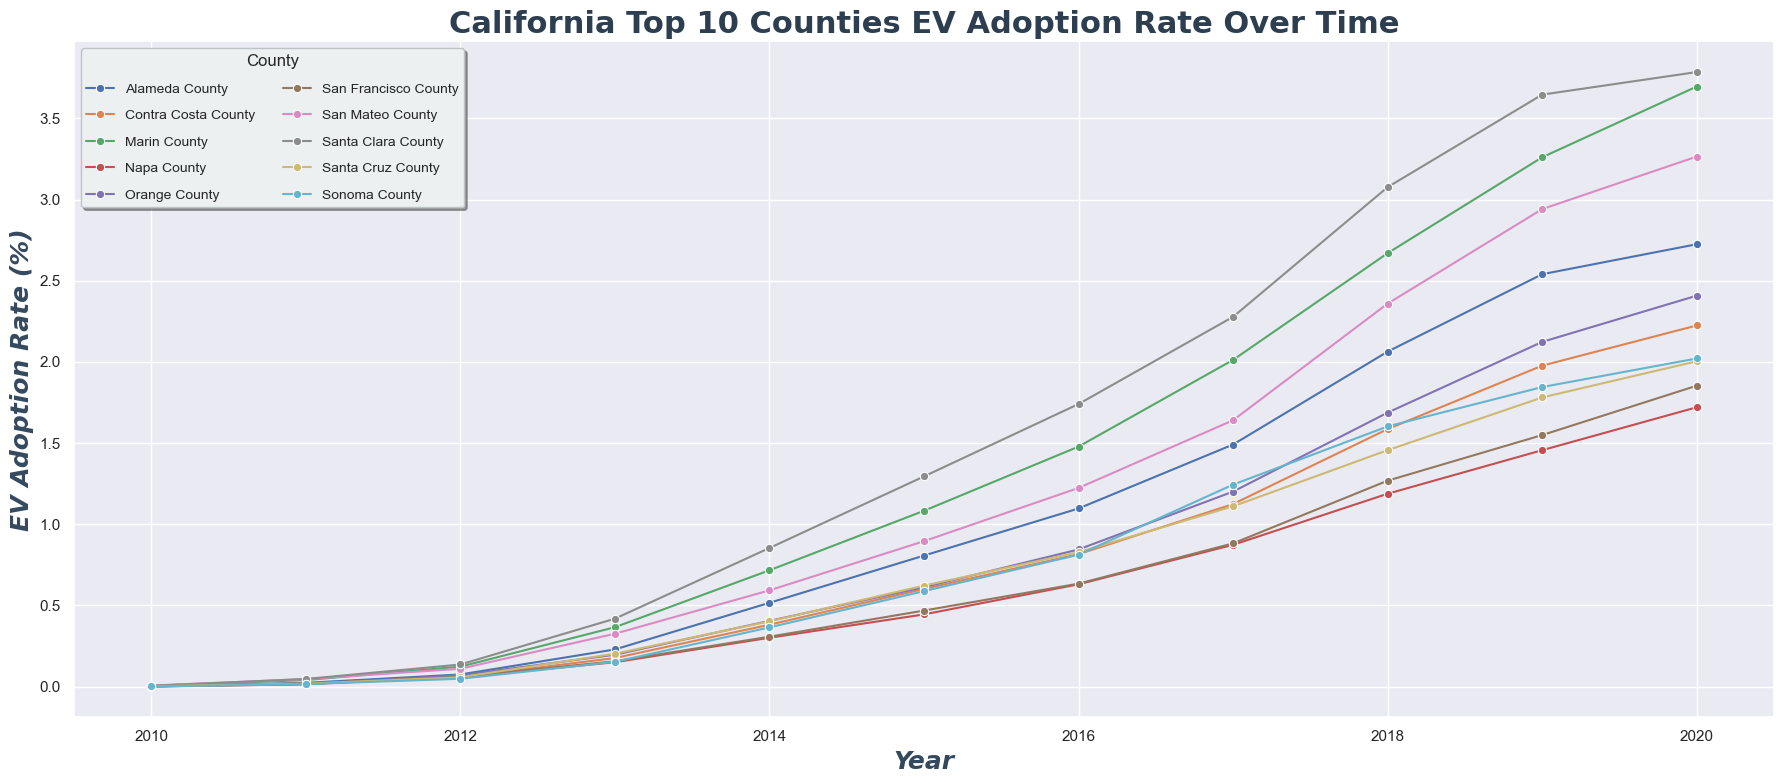

In [24]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in California

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=ca_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="California Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

file_name = "ca_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

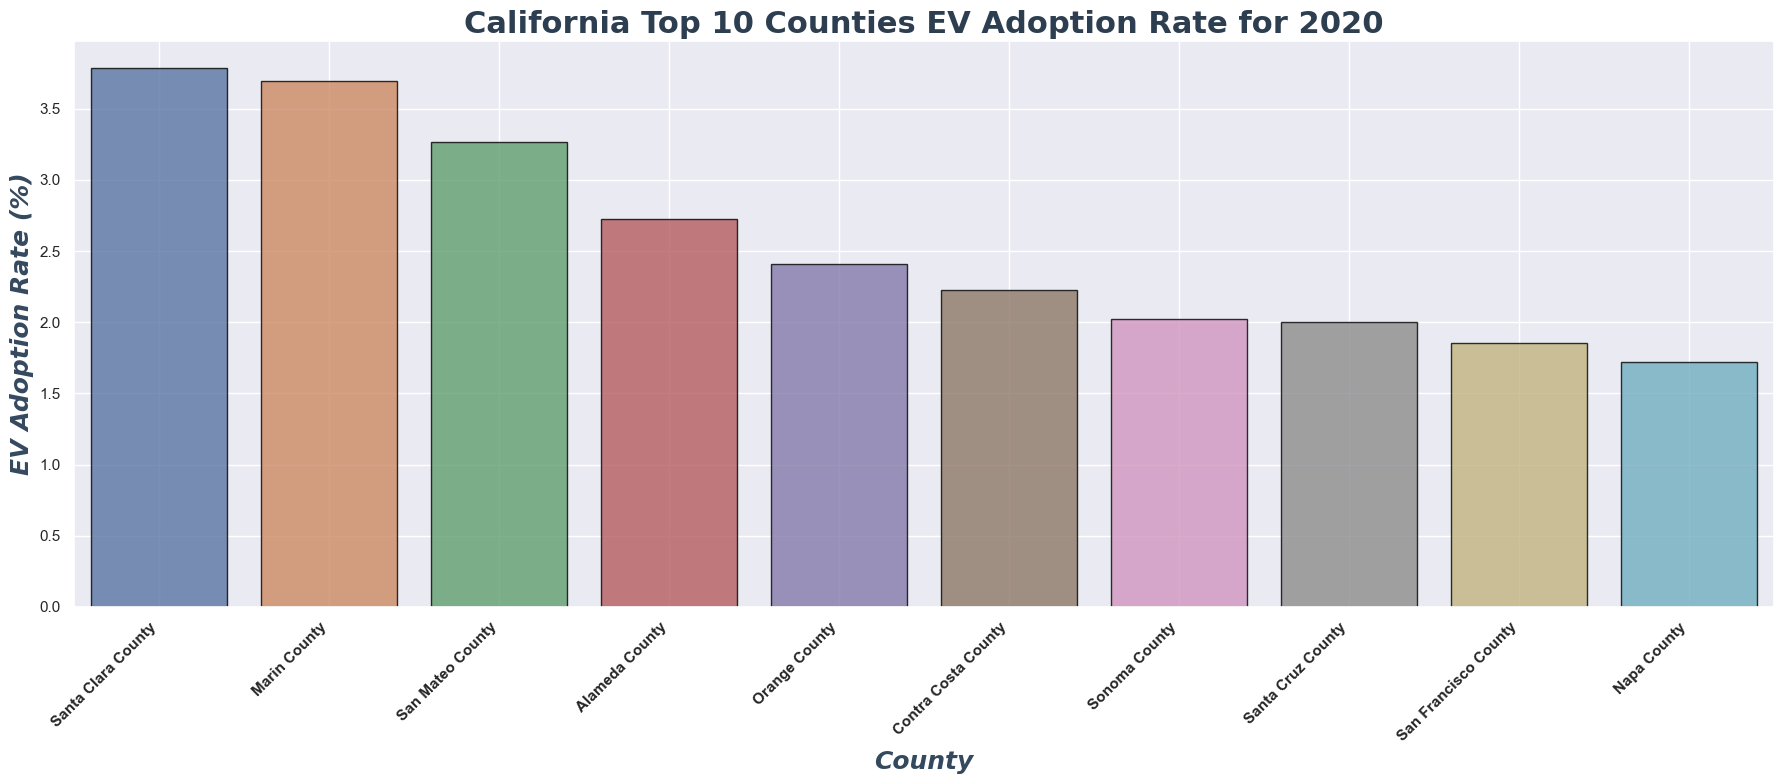

In [25]:
# Filter the data for the year to plot for California
year_to_plot = 2020
year_df = ca_top_10_df[ca_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'California Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "ca_top_10_counties_2020.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')
# Show the plot
plt.show()